# Sound Analysis

A notebook to try out some code to:

1. Analyse sound data.
2. If possible, come up with a function that detect bolts sounds.

## Imports

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Visualizing

Visualizing cat and dog sounds with FFT and spectograms.

dog sr = 16000, cat sr = 16000


Text(0.5, 1.0, 'Cat')

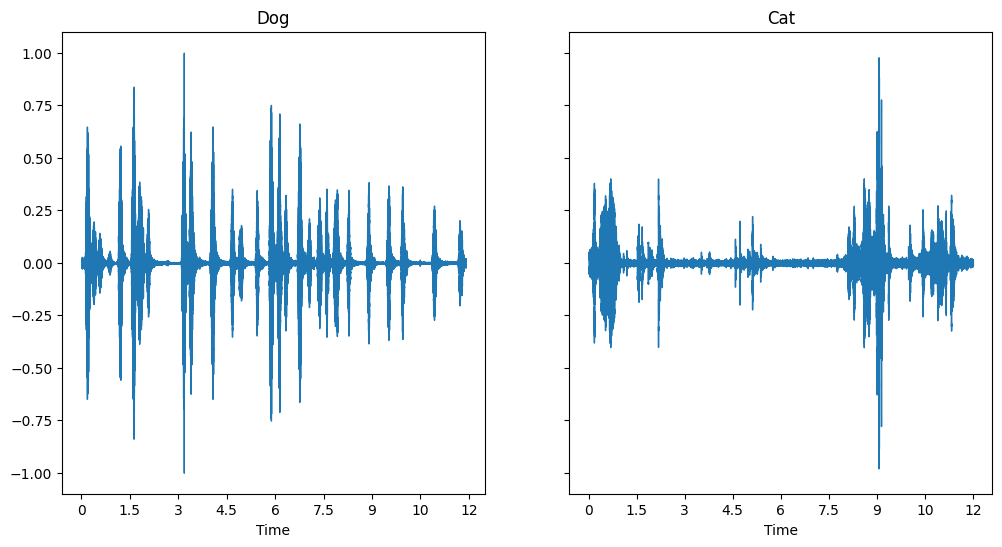

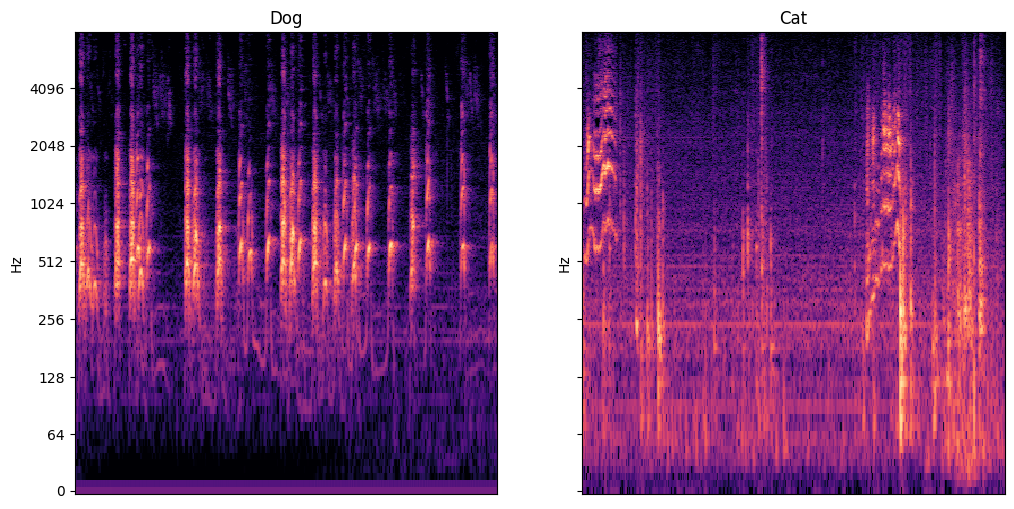

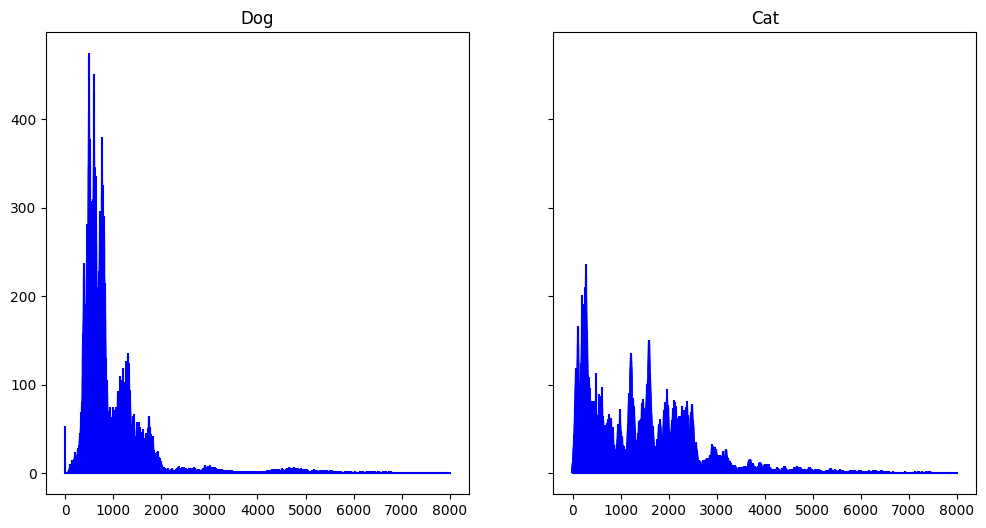

In [2]:
# Prepare data
## Dog
y_dog, sr_dog = librosa.load('../data/dog_barking_2.wav', sr=None)
d_dog = librosa.amplitude_to_db(np.abs(librosa.stft(y_dog)), ref=np.max)
fft_dog = np.fft.fft(y_dog)
N_dog = len(fft_dog)
n_dog = np.arange(N_dog)
T_dog = N_dog/sr_dog
freq_dog = n_dog/T_dog 
## Cat
y_cat, sr_cat = librosa.load('../data/cat_2.wav', sr=None)
d_cat = librosa.amplitude_to_db(np.abs(librosa.stft(y_cat)), ref=np.max)
fft_cat = np.fft.fft(y_cat)
N_cat = len(fft_cat)
n_cat = np.arange(N_cat)
T_cat = N_cat/sr_cat
freq_cat = n_cat/T_cat
print(f'dog sr = {sr_dog}, cat sr = {sr_cat}')

# Plot data
## Waveform
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
librosa.display.waveshow(y_dog, sr=sr_dog, ax=axes[0])
librosa.display.waveshow(y_cat, sr=sr_cat, ax=axes[1])
axes[0].set_title("Dog")
axes[1].set_title("Cat")
## Spectograms
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
librosa.display.specshow(d_dog, y_axis='log', sr=sr_dog, ax=axes[0])
librosa.display.specshow(d_cat, y_axis='log', sr=sr_cat, ax=axes[1])
axes[0].set_title("Dog")
axes[1].set_title("Cat")
## FFT (one-sided)
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
axes[0].stem(freq_dog[:N_dog//2], np.abs(fft_dog)[:N_dog//2], 'b', markerfmt=" ", basefmt="-b")
axes[1].stem(freq_cat[:N_cat//2], np.abs(fft_cat)[:N_cat//2], 'b', markerfmt=" ", basefmt="-b")
axes[0].set_title("Dog")
axes[1].set_title("Cat")



### Features

FFT

In [3]:
def plot_func(index):
    # Max index = 112
    index = min(index, 112)
    # Data
    y_dog, sr_dog = librosa.load('../data/dog_barking_' + str(index) + '.wav', sr=None)
    fft_dog = np.fft.fft(y_dog)
    N_dog = len(fft_dog)
    n_dog = np.arange(N_dog)
    T_dog = N_dog/sr_dog
    freq_dog = n_dog/T_dog 
    ## Cat
    y_cat, sr_cat = librosa.load('../data/cat_' + str(index) + '.wav', sr=None)
    fft_cat = np.fft.fft(y_cat)
    N_cat = len(fft_cat)
    n_cat = np.arange(N_cat)
    T_cat = N_cat/sr_cat
    freq_cat = n_cat/T_cat    
    ## FFT (one-sided)
    _, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
    axes[0].stem(freq_dog[:N_dog//2], np.abs(fft_dog)[:N_dog//2], 'b', markerfmt=" ", basefmt="-b")
    axes[1].stem(freq_cat[:N_cat//2], np.abs(fft_cat)[:N_cat//2], 'b', markerfmt=" ", basefmt="-b")
    axes[0].set_title("Dog")
    axes[1].set_title("Cat")

slider = widgets.IntSlider(min=1,max=112)
widgets.HBox([slider])
widgets.interact(plot_func, index=slider)

interactive(children=(IntSlider(value=1, description='index', max=112, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_func(index)>

Chroma STFT

In [5]:
def plot_func(index):
    # Max index = 112
    index = min(index, 112)
    # Data
    y_dog, sr_dog = librosa.load('../data/dog_barking_' + str(index) + '.wav', sr=None)
    c_dog = librosa.feature.chroma_stft(y=y_dog, sr=sr_dog)
    y_cat, sr_cat = librosa.load('../data/cat_' + str(index) + '.wav', sr=None)
    c_cat = librosa.feature.chroma_stft(y=y_cat, sr=sr_cat)
    # Plot
    _, ax = plt.subplots(1, 2, sharey=True, figsize=(12,6))
    librosa.display.specshow(c_dog, y_axis='chroma', x_axis='time', ax=ax[0])
    librosa.display.specshow(c_cat, y_axis='chroma', x_axis='time', ax=ax[1])
    ax[0].set_title("Dog")
    ax[1].set_title("Cat")

slider = widgets.IntSlider(min=1,max=112)
widgets.HBox([slider])
widgets.interact(plot_func, index=slider)

interactive(children=(IntSlider(value=1, description='index', max=112, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_func(index)>

Chroma CQT

In [6]:
def plot_func(index):
    # Max index = 112
    index = min(index, 112)
    # Data
    y_dog, sr_dog = librosa.load('../data/dog_barking_' + str(index) + '.wav', sr=None)
    c_dog = librosa.feature.chroma_cqt(y=y_dog, sr=sr_dog)
    y_cat, sr_cat = librosa.load('../data/cat_' + str(index) + '.wav', sr=None)
    c_cat = librosa.feature.chroma_cqt(y=y_cat, sr=sr_cat)
    # Plot
    _, ax = plt.subplots(1, 2, sharey=True, figsize=(12,6))
    librosa.display.specshow(c_dog, y_axis='chroma', x_axis='time', ax=ax[0])
    librosa.display.specshow(c_cat, y_axis='chroma', x_axis='time', ax=ax[1])
    ax[0].set_title("Dog")
    ax[1].set_title("Cat")

slider = widgets.IntSlider(min=1,max=112)
widgets.HBox([slider])
widgets.interact(plot_func, index=slider)

interactive(children=(IntSlider(value=1, description='index', max=112, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_func(index)>

Mel spectogram

In [7]:
def plot_func(index):
    # Max index = 112
    index = min(index, 112)
    # Data
    y_dog, sr_dog = librosa.load('../data/dog_barking_' + str(index) + '.wav', sr=None)
    s_dog = librosa.feature.melspectrogram(y=y_dog, sr=sr_dog)
    s_db_dog = librosa.power_to_db(s_dog, ref=np.max)
    y_cat, sr_cat = librosa.load('../data/cat_' + str(index) + '.wav', sr=None)
    s_cat = librosa.feature.melspectrogram(y=y_cat, sr=sr_cat)
    s_db_cat = librosa.power_to_db(s_cat, ref=np.max)
    # Plot
    _, ax = plt.subplots(1, 2, sharey=True, figsize=(12,6))
    librosa.display.specshow(s_db_dog, y_axis='mel', x_axis='time', ax=ax[0])
    librosa.display.specshow(s_db_cat, y_axis='mel', x_axis='time', ax=ax[1])
    ax[0].set_title("Dog")
    ax[1].set_title("Cat")

slider = widgets.IntSlider(min=1,max=112)
widgets.HBox([slider])
widgets.interact(plot_func, index=slider)

interactive(children=(IntSlider(value=1, description='index', max=112, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_func(index)>

MFCC

In [8]:
def plot_func(index):
    # Max index = 112
    index = min(index, 112)
    # Data
    y_dog, sr_dog = librosa.load('../data/dog_barking_' + str(index) + '.wav', sr=None)
    s_dog = librosa.feature.mfcc(y=y_dog, sr=sr_dog)
    y_cat, sr_cat = librosa.load('../data/cat_' + str(index) + '.wav', sr=None)
    s_cat = librosa.feature.mfcc(y=y_cat, sr=sr_cat)
    # Plot
    _, ax = plt.subplots(1, 2, sharey=True, figsize=(12,6))
    librosa.display.specshow(s_dog, y_axis='mel', x_axis='time', ax=ax[0])
    librosa.display.specshow(s_cat, y_axis='mel', x_axis='time', ax=ax[1])
    ax[0].set_title("Dog")
    ax[1].set_title("Cat")

slider = widgets.IntSlider(min=1,max=112)
widgets.HBox([slider])
widgets.interact(plot_func, index=slider)

interactive(children=(IntSlider(value=1, description='index', max=112, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_func(index)>

Poly features

In [17]:
def plot_func(index):
    # Max index = 112
    index = min(index, 112)
    # Data
    y_dog, sr_dog = librosa.load('../data/dog_barking_' + str(index) + '.wav', sr=None)
    s_dog = np.abs(librosa.stft(y=y_dog))
    p0_dog = librosa.feature.poly_features(S=s_dog, order=0)
    p1_dog = librosa.feature.poly_features(S=s_dog, order=1)
    p2_dog = librosa.feature.poly_features(S=s_dog, order=2)
    p3_dog = librosa.feature.poly_features(S=s_dog, order=3)
    p4_dog = librosa.feature.poly_features(S=s_dog, order=4)
    y_cat, sr_cat = librosa.load('../data/cat_' + str(index) + '.wav', sr=None)
    s_cat = np.abs(librosa.stft(y=y_cat))
    p0_cat = librosa.feature.poly_features(S=s_cat, order=0)
    p1_cat = librosa.feature.poly_features(S=s_cat, order=1)
    p2_cat = librosa.feature.poly_features(S=s_cat, order=2)
    p3_cat = librosa.feature.poly_features(S=s_cat, order=3)
    p4_cat = librosa.feature.poly_features(S=s_cat, order=4)
    # Plot
    _, ax = plt.subplots(5, 2, sharey=True, figsize=(12,24))
    t_dog = librosa.times_like(p0_dog)
    t_cat = librosa.times_like(p0_cat)
    # Term 0
    ax[0,0].plot(t_dog, p0_dog[0], label='order=0', alpha=0.8)
    ax[0,0].plot(t_dog, p1_dog[1], label='order=1', alpha=0.8)
    ax[0,0].plot(t_dog, p2_dog[2], label='order=2', alpha=0.8)
    ax[0,0].plot(t_dog, p3_dog[3], label='order=3', alpha=0.8)
    ax[0,0].plot(t_dog, p4_dog[4], label='order=4', alpha=0.8)
    ax[0,1].plot(t_cat, p0_cat[0], label='order=0', alpha=0.8)
    ax[0,1].plot(t_cat, p1_cat[1], label='order=1', alpha=0.8)
    ax[0,1].plot(t_cat, p2_cat[2], label='order=2', alpha=0.8)
    ax[0,1].plot(t_cat, p3_cat[3], label='order=3', alpha=0.8)
    ax[0,1].plot(t_cat, p4_cat[4], label='order=4', alpha=0.8)
    ax[0,0].set_title("Dog")
    ax[0,0].legend()
    ax[0,1].set_title("Cat")
    ax[0,1].legend()    
    ax[0,0].set(ylabel='Term 0')
    # Term 1
    ax[1,0].plot(t_dog, p1_dog[0], label='order=1', alpha=0.8)
    ax[1,0].plot(t_dog, p2_dog[1], label='order=2', alpha=0.8)
    ax[1,0].plot(t_dog, p3_dog[2], label='order=3', alpha=0.8)
    ax[1,0].plot(t_dog, p4_dog[3], label='order=4', alpha=0.8)
    ax[1,1].plot(t_cat, p1_cat[0], label='order=1', alpha=0.8)
    ax[1,1].plot(t_cat, p2_cat[1], label='order=2', alpha=0.8)
    ax[1,1].plot(t_cat, p3_cat[2], label='order=3', alpha=0.8)
    ax[1,1].plot(t_cat, p4_cat[3], label='order=4', alpha=0.8)
    ax[1,0].legend()
    ax[1,1].legend()    
    ax[1,0].set(ylabel='Term 1')
    # Term 2
    ax[2,0].plot(t_dog, p2_dog[0], label='order=2', alpha=0.8)
    ax[2,0].plot(t_dog, p3_dog[1], label='order=3', alpha=0.8)
    ax[2,0].plot(t_dog, p4_dog[2], label='order=4', alpha=0.8)
    ax[2,1].plot(t_cat, p2_cat[0], label='order=2', alpha=0.8)
    ax[2,1].plot(t_cat, p3_cat[1], label='order=3', alpha=0.8)
    ax[2,1].plot(t_cat, p4_cat[2], label='order=4', alpha=0.8)
    ax[2,0].legend()
    ax[2,1].legend()    
    ax[2,0].set(ylabel='Term 2')
    # Term 3
    ax[3,0].plot(t_dog, p3_dog[0], label='order=3', alpha=0.8)
    ax[3,0].plot(t_dog, p4_dog[1], label='order=4', alpha=0.8)
    ax[3,1].plot(t_cat, p3_cat[0], label='order=3', alpha=0.8)
    ax[3,1].plot(t_cat, p4_cat[1], label='order=4', alpha=0.8)
    ax[3,0].legend()
    ax[3,1].legend()    
    ax[3,0].set(ylabel='Term 3')
    # Term 2
    ax[4,0].plot(t_dog, p4_dog[0], label='order=4', alpha=0.8)
    ax[4,1].plot(t_cat, p4_cat[0], label='order=4', alpha=0.8)
    ax[4,0].legend()
    ax[4,1].legend()    
    ax[4,0].set(ylabel='Term 4')


slider = widgets.IntSlider(min=1,max=112)
widgets.HBox([slider])
widgets.interact(plot_func, index=slider)

interactive(children=(IntSlider(value=1, description='index', max=112, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_func(index)>